<a href="https://colab.research.google.com/github/pavlyk/DataScience/blob/master/ODS_q1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
#import seaborn as sns; sns.set()

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [0]:
# Generate synthetic data
np.random.seed(17)
n_instances, n_features, scale = 300, 20, 15

df = pd.DataFrame({
    'x1': (2 * np.random.random((n_instances)) - 1) * scale,
    'x2': (2 * np.random.random((n_instances)) - 1) * scale
})

for i in range(3, n_features + 1):
    df['x' + str(i)] = (2 * np.random.random(n_instances) - 1) * scale

df['y'] = ((df['x1'] ** 2 / 4 + df['x2'] ** 2 / 9) <= 16).astype('uint8') 

In [0]:
X, y = df.drop('y', axis=1).values, df['y'].values
feature_names = df.drop('y', axis=1).columns
# baseline accuracy
1 - y.mean()

0.6833333333333333

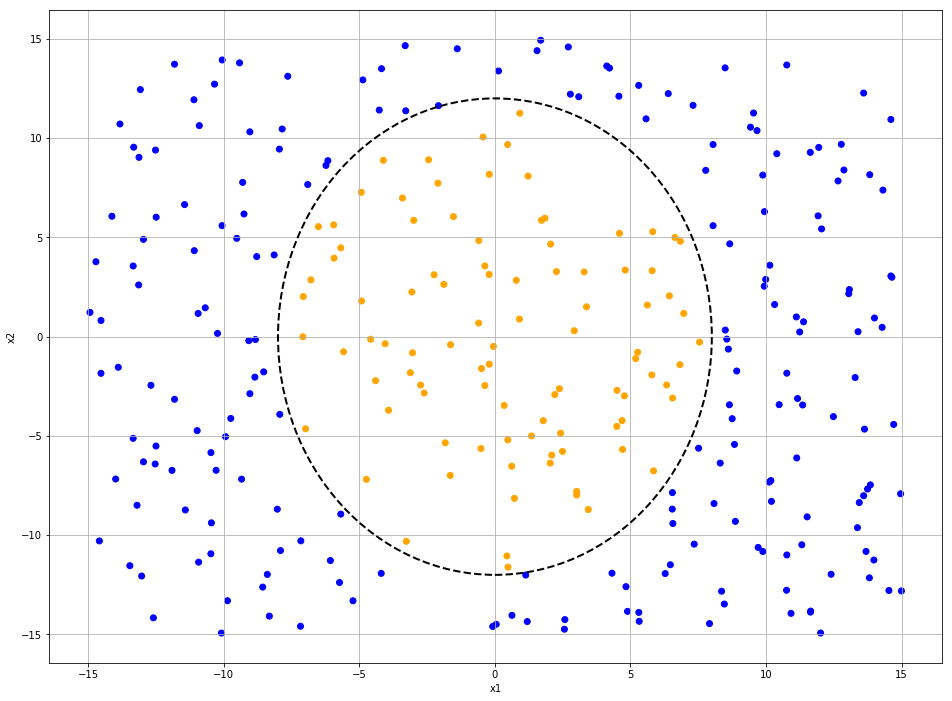

In [0]:
from matplotlib import patches

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, aspect='auto')

def plot_data(ax):
    ax.scatter(df['x1'], df['x2'], c=df['y'].map({0: 'blue', 1: 'orange'}));
    ellipse = patches.Ellipse((0, 0), 16, 24, linewidth=2, fill=False, zorder=2, color='black', linestyle='dashed')
    ax.add_patch(ellipse);
    plt.xlabel('x1')
    plt.ylabel('x2')
    ax.grid(True);

plot_data(ax)

In [0]:
basic_tree = DecisionTreeClassifier(random_state=17)
basic_tree.fit(X, y)
basic_tree.score(X, y)

1.0

In [0]:
basic_tree.feature_importances_

array([0.53066016, 0.36752891, 0.        , 0.        , 0.02389651,
       0.        , 0.        , 0.01283697, 0.        , 0.        ,
       0.        , 0.02768606, 0.        , 0.        , 0.01428483,
       0.00770218, 0.        , 0.        , 0.01540436, 0.        ])

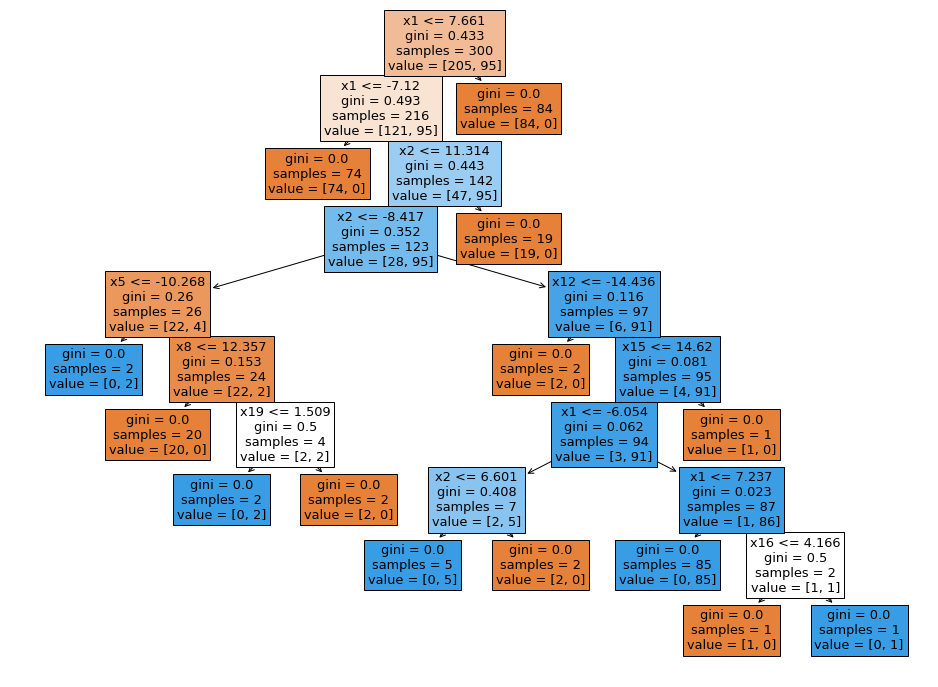

In [0]:
plt.rcParams['figure.figsize'] = (16, 12)
plot_tree(basic_tree, filled=True, feature_names=feature_names);

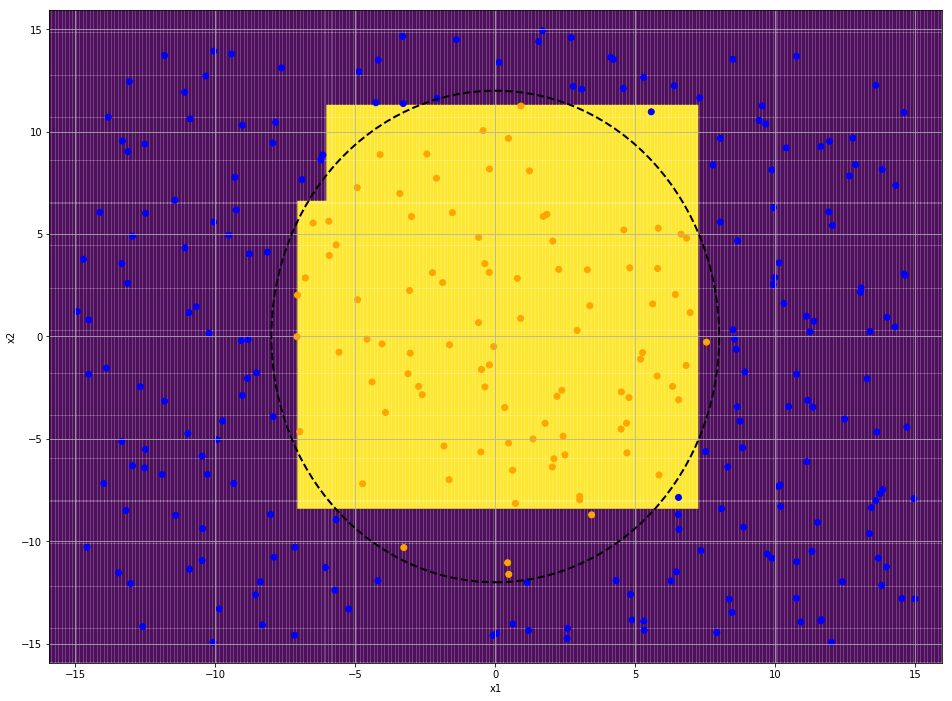

In [0]:
def get_grid(data, step=0.05):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, aspect='auto')

def plot_decision_surface(ax, tree, X, num_features):


    # code to visualize separating surface
    xx, yy = get_grid(X)
    # we are setting to zero all features apart from first two 
    predicted = tree.predict(np.c_[xx.ravel(), yy.ravel(), 
                                   np.zeros([xx.ravel().shape[0], num_features - 2])]).reshape(xx.shape)
    plt.pcolormesh(xx, yy, predicted, cmap='viridis', alpha=0.5)
    
    plot_data(ax)
    
plot_decision_surface(ax, basic_tree, X, num_features=len(feature_names))